# Analysis Overview
In this assignment we will be building logistic regression models for binary classification. We will follow the predictive modeling framework that we have developed in the course, and we will evaluate the models in-sample and out-of-sample using metrics that are valid for the binary classification problem. The instructions below are a rough outline of the statistical analysis to be performed and written up in a proper statistical report.

In [0]:
import pandas as pd

### Data
The data for this assignment is the UniversalBank.csv data set. This data will be made available by your instructor. The response variable is PersonalLoan. You will be modeling who is more likely to open a personal loan.

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Machine-Learning/main/datasets/UniversalBank.csv')
data.rename(columns = {'ZIP Code': 'Zip'}, inplace = True)
data

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### 1. Split the Sample Population

Define a function to create the test/train split:

In [0]:
from sklearn.model_selection import train_test_split

def model_sets(df,independent_vars,dependent_var):
    X = df[independent_vars].to_numpy()
    y = df[dependent_var].to_numpy()

    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

    ### Rebuild Train Set into DF
    X_train = pd.DataFrame(data = X_train, columns = independent_vars)
    y_train = pd.DataFrame(data = y_train, columns = dependent_var)
    train_df = X_train.join(y_train)

    ### Rebuild Test Set into DF
    X_test = pd.DataFrame(data = X_test, columns = independent_vars)
    y_test = pd.DataFrame(data = y_test, columns = dependent_var)
    test_df = X_test.join(y_test)

    return train_df, test_df, X_train, X_test, y_train, y_test

The test / train split is applied to the data using the previously defined function, resulting in 3,500 records in the train dataset and 1,500 records in the test dataset.

In [0]:
data

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [0]:
independent_vars = ['Age', 'Experience', 'Income', 'Zip', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']
dependent_var = ['PersonalLoan']

model_set_1 = model_sets(data,independent_vars,dependent_var)

model_set_1[0]['model_group'] = 'train'
model_set_1[1]['model_group'] = 'test'

model_set_1_full = model_set_1[0].append(model_set_1[1])

model_set_1_full.groupby('model_group')[['model_group']].count()

,model_group
model_group,
test,1500
train,3500


### Exploratory Data Analysis

Types of Variables:

In [0]:
string_cols = ['Family', 'Education', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']
int_cols    = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
geo         = ['ZIP Code']

Personal loan conversion rates by categorical.

In [0]:
model_set_1[0] 

,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan,model_group
0,52.0,28.0,118.0,90503.0,2.0,6.8,1.0,112.0,0.0,0.0,1.0,0.0,0,train
1,43.0,18.0,94.0,94110.0,4.0,1.1,2.0,0.0,0.0,0.0,0.0,0.0,0,train
2,39.0,12.0,23.0,90024.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0,train
3,65.0,41.0,133.0,94904.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1,train
4,57.0,32.0,23.0,92126.0,2.0,0.2,3.0,0.0,0.0,0.0,0.0,0.0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,55.0,31.0,134.0,92130.0,2.0,0.3,1.0,0.0,0.0,0.0,0.0,0.0,0,train
3496,35.0,9.0,28.0,94546.0,1.0,0.6,3.0,0.0,0.0,0.0,0.0,1.0,0,train
3497,31.0,7.0,108.0,94507.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0,train
3498,46.0,20.0,54.0,90755.0,4.0,2.9,1.0,189.0,0.0,0.0,1.0,1.0,0,train


In [0]:
grp_df = pd.DataFrame()  
 
df = model_set_1[0]  
  
for col in string_cols:
    df_groups = df.groupby([col])[['PersonalLoan']].sum() \
        .join(df.groupby([col])[['model_group']].count())
    
    df_groups['conversion_rate'] = df_groups['PersonalLoan']/df_groups['model_group']
    df_groups['metric'] = col
    
    grp_df = grp_df.append(df_groups)

grp_df.reset_index(inplace = True)     
    
grp_df = grp_df[['metric', 'index', 'PersonalLoan', 'model_group', 'conversion_rate']]    
grp_df.rename(columns={'PersonalLoan':'has_pl','ID':'volume','index':'metric_value'}, inplace=True)

grp_df

,metric,metric_value,has_pl,model_group,conversion_rate
0,Family,1.0,78,1033,0.075508
1,Family,2.0,76,894,0.085011
2,Family,3.0,91,706,0.128895
3,Family,4.0,98,867,0.113033
4,Education,1.0,65,1458,0.044582
5,Education,2.0,125,988,0.126518
6,Education,3.0,153,1054,0.145161
7,SecuritiesAccount,0.0,299,3126,0.095649
8,SecuritiesAccount,1.0,44,374,0.117647
9,CDAccount,0.0,248,3294,0.075288


Family
/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


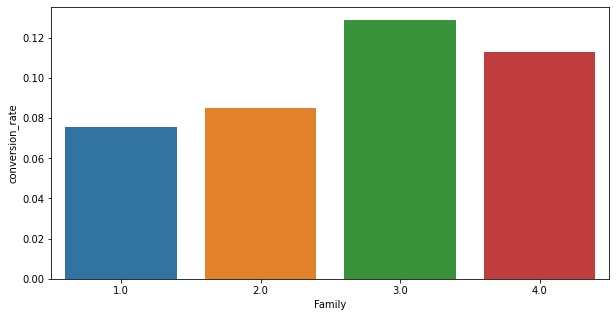

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
Education


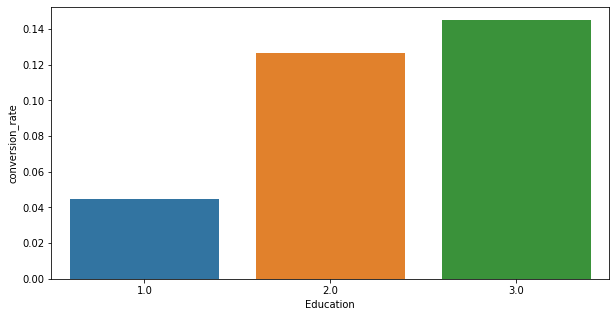

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
SecuritiesAccount


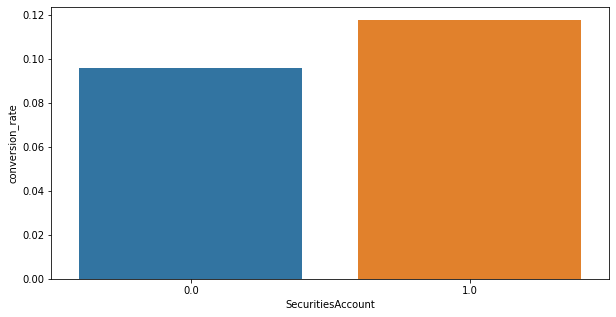

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
CDAccount


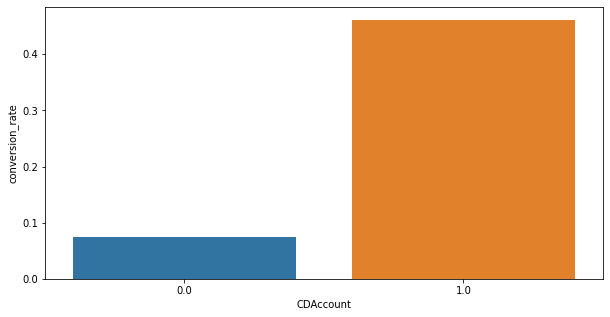

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
Online


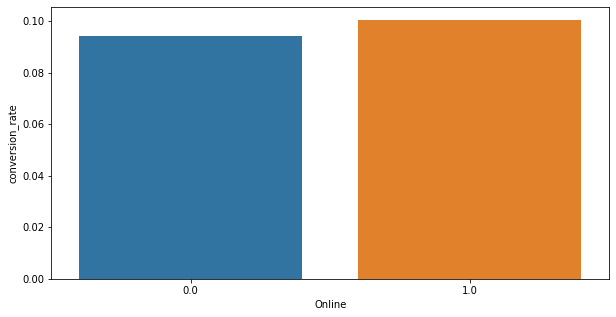

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
CreditCard


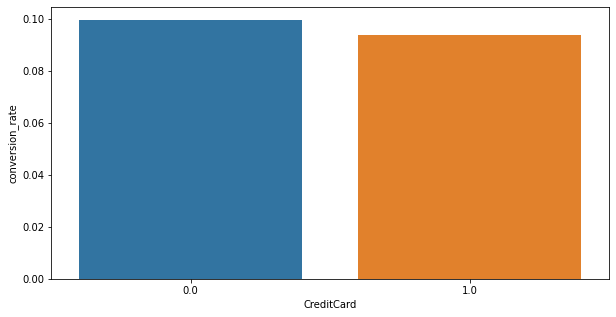

In [0]:
import seaborn as sns                       # import seaborn
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)     # specify chart size
# define sns barplot for analyzing concentration of categorical values
def sns_bar_plot(df, val_grp, val_freq):
    return sns.barplot(df=val_freq, y='concentration', hue=val_grp, data=df)

for col in (string_cols):
    #df = grp_df[grp_df['metric'] == col]
    df = grp_df.loc[grp_df['metric'] == col, :]
    df.rename(columns={'metric_value':col}, inplace = True)
    sns.barplot(x=df[col], y='conversion_rate', data=df)
    print(col)
    plt.show()

Plot Continuous Variables:

In [0]:
# use descriptive stats to analyze histogram ranges
model_set_1[0][int_cols].describe()  

,Age,Experience,Income,CCAvg,Mortgage
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.130571,19.894286,73.919143,1.953711,55.643429
std,11.451593,11.466054,45.837275,1.767532,100.778106
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,29.000000,98.000000,2.600000,100.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


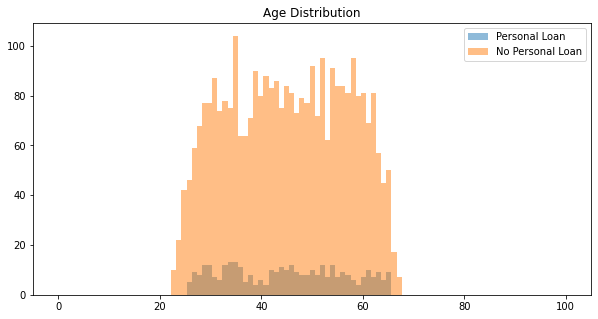

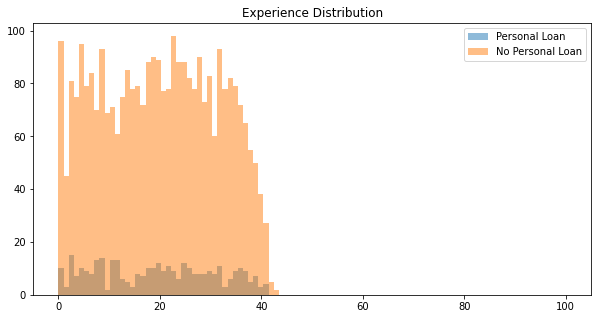

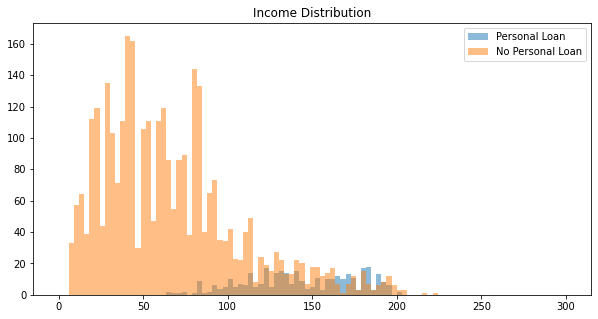

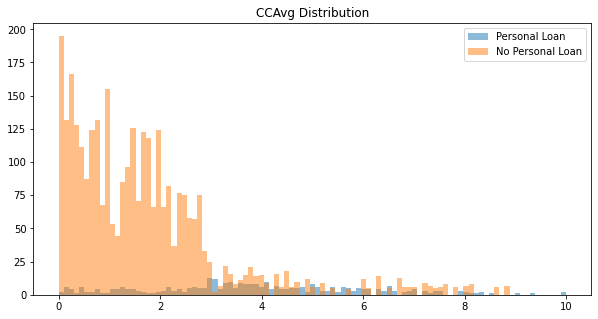

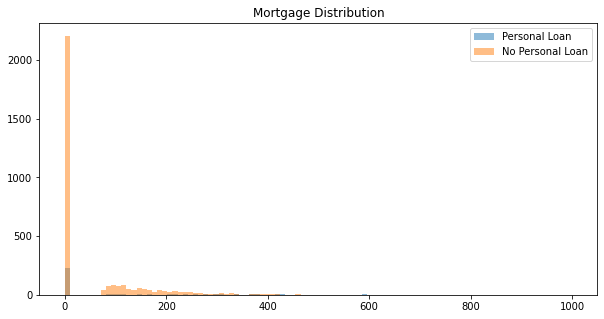

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5) 

df = model_set_1[0]  

data_good = df[df['PersonalLoan'] == 1]
data_bad = df[df['PersonalLoan'] == 0]

# histogram of continuous var distributions
def hist_plot(freq_var, bins):
    plt.hist(data_good[freq_var], bins, alpha=0.5, label='Personal Loan')
    plt.hist(data_bad[freq_var] , bins, alpha=0.5, label='No Personal Loan')
    plt.legend(loc='upper right')
    plt.title(f'{freq_var} Distribution')

    return plt.show()
  
hist_plot('Age',np.linspace(0, 100, 100))
hist_plot('Experience',np.linspace(0, 100, 100))
hist_plot('Income',np.linspace(0, 300, 100))
hist_plot('CCAvg',np.linspace(0, 10, 100))
hist_plot('Mortgage',np.linspace(0, 1000, 100)) # create binary? 

In [0]:
# pearson correlations
model_set_1[0][['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'PersonalLoan']].corr()[['PersonalLoan']]

,PersonalLoan
Age,-0.004682
Experience,-0.003247
Income,0.499580
CCAvg,0.370138
Mortgage,0.133912
PersonalLoan,1.000000


### Feature Creation

### Fit Naïve Model as Baseline Model

In [0]:
from sklearn.linear_model import LogisticRegression

#################
# [0]: train_df, 
# [1]: test_df, 
# [2]: X_train, 
# [3]: X_test, 
# [4]: y_train,
# [5]: y_test

def log_reg(X_train,y_train,X_test,model):
    log_reg = LogisticRegression(max_iter=7600)
    log_reg.fit(X_train,y_train.values.ravel())                               # used ravel https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
    return pd.DataFrame(data = log_reg.predict(X_test), columns = [model]) 

def log_reg_modelset(model_set):
    return model_set[1].join(log_reg(model_set[2],model_set[4],model_set[3],'y_pred'))
  
   
independent_vars = ['Income', 'CCAvg', 'CDAccount', 'Education', 'Family']
dependent_var    = ['PersonalLoan']

niave_model_set = model_sets(data,independent_vars,dependent_var)

niave_model = log_reg_modelset(niave_model_set) #<-- DataFrame output containing y_actual and predictions

from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(niave_model[['PersonalLoan']], niave_model[['y_pred']])

niave_matrix = pd.DataFrame([['Niave',conf_matrix[0][0],conf_matrix[0][1],conf_matrix[1][0],conf_matrix[1][1]]], columns = ['Model','TP','TN','FP','FN'])
display(niave_matrix)

Model,TP,TN,FP,FN
Niave,1345,18,50,87


/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


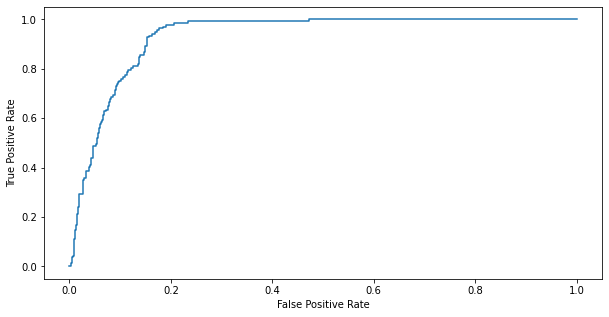

AUC =  0.9311683651884262


In [0]:
from sklearn import metrics

#################
# [0]: train_df, 
# [1]: test_df, 
# [2]: X_train, 
# [3]: X_test, 
# [4]: y_train,
# [5]: y_test

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(model_set_1[2],model_set_1[4])

#define metrics
y_pred_proba = log_regression.predict_proba(model_set_1[3])[::,1]
fpr_n, tpr_n, _ = metrics.roc_curve(model_set_1[5],  y_pred_proba)
auc_n = metrics.roc_auc_score(model_set_1[5], y_pred_proba)

#create ROC curve
plt.plot(fpr_n,tpr_n)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('AUC = ',auc_n)

### Creating Champion Challenger Models

#### Challenger Model 1 - R stepAIC derived model

In [0]:
spark.createDataFrame(model_set_1[0]).createOrReplaceTempView('train')
spark.sql('select * from train').display()

Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan,model_group
52.0,28.0,118.0,90503.0,2.0,6.8,1.0,112.0,0.0,0.0,1.0,0.0,0,train
43.0,18.0,94.0,94110.0,4.0,1.1,2.0,0.0,0.0,0.0,0.0,0.0,0,train
39.0,12.0,23.0,90024.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0,train
65.0,41.0,133.0,94904.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1,train
57.0,32.0,23.0,92126.0,2.0,0.2,3.0,0.0,0.0,0.0,0.0,0.0,0,train
62.0,37.0,93.0,93003.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1,train
50.0,24.0,45.0,94105.0,3.0,0.6,2.0,117.0,0.0,0.0,1.0,0.0,0,train
56.0,30.0,50.0,94022.0,4.0,2.8,2.0,0.0,1.0,0.0,1.0,0.0,0,train
43.0,13.0,38.0,95616.0,3.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0,train
52.0,27.0,93.0,90291.0,4.0,4.1,2.0,0.0,0.0,0.0,0.0,1.0,1,train


In [0]:
%r
library(SparkR)

processed_r <- SparkR::sql('select Age, Experience, Income, Family, CCAvg, Education, Mortgage, SecuritiesAccount, CDAccount, Online, CreditCard, PersonalLoan from train')

processed_r <- collect(processed_r)

m1 <- lm(PersonalLoan ~ Income + CCAvg + CDAccount + Education + Family, data=processed_r)

print(summary(m1))


Call:
lm(formula = PersonalLoan ~ Income + CCAvg + CDAccount + Education + 
    Family, data = processed_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77533 -0.13562 -0.03327  0.06633  1.05373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.4077657  0.0158778 -25.682  < 2e-16 ***
Income       0.0031194  0.0001178  26.482  < 2e-16 ***
CCAvg        0.0115764  0.0030081   3.848 0.000121 ***
CDAccount    0.2560998  0.0173306  14.777  < 2e-16 ***
Education    0.0820537  0.0048425  16.944  < 2e-16 ***
Family       0.0344953  0.0035240   9.789  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2363 on 3494 degrees of freedom
Multiple R-squared:  0.3694,	Adjusted R-squared:  0.3685 
F-statistic: 409.3 on 5 and 3494 DF,  p-value: < 2.2e-16


In [0]:
%r
# Define the upper model as the FULL model
upper.lm <- lm(PersonalLoan ~ .,data=processed_r);

# Note: There is only one function for classical model selection in R - stepAIC();
# stepAIC() is part of the MASS library. 
library(MASS)

# Call stepAIC() for variable selection
print('stepwise')
stepwise.lm <- stepAIC(object=m1,scope=list(upper=formula(upper.lm),lower=~1),
direction=c('both'));

[1] "stepwise"
Start:  AIC=-10092.47
PersonalLoan ~ Income + CCAvg + CDAccount + Education + Family

                    Df Sum of Sq    RSS      AIC
+ CreditCard         1     1.061 194.04 -10109.6
+ SecuritiesAccount  1     0.669 194.43 -10102.5
+ Mortgage           1     0.221 194.88 -10094.4
+ Experience         1     0.187 194.92 -10093.8
+ Online             1     0.148 194.96 -10093.1
+ Age                1     0.134 194.97 -10092.9
<none>                           195.10 -10092.5
- CCAvg              1     0.827 195.93 -10079.7
- Family             1     5.350 200.45  -9999.8
- CDAccount          1    12.194 207.30  -9882.3
- Education          1    16.032 211.13  -9818.1
- Income             1    39.160 234.26  -9454.3

Step:  AIC=-10109.56
PersonalLoan ~ Income + CCAvg + CDAccount + Education + Family + 
    CreditCard

                    Df Sum of Sq    RSS      AIC
+ SecuritiesAccount  1     0.895 193.15 -10123.7
+ Online             1     0.208 193.83 -10111.3
+ Mortgage 

In [0]:
independent_vars = ['Income', 'CCAvg', 'CDAccount', 'Education', 'Family','CreditCard','SecuritiesAccount','Online','Experience','Age','Mortgage']
dependent_var    = ['PersonalLoan']

setpAIC_set = model_sets(data,independent_vars,dependent_var)

setpAIC_model = log_reg_modelset(setpAIC_set) #<-- DataFrame output containing y_actual and predictions

## Confusion Matrix
conf_matrix = confusion_matrix(setpAIC_model[['PersonalLoan']], setpAIC_model[['y_pred']])

stepAIC_matrix = pd.DataFrame([['StepAIC',conf_matrix[0][0],conf_matrix[0][1],conf_matrix[1][0],conf_matrix[1][1]]], columns = ['Model','TP','TN','FP','FN'])
display(stepAIC_matrix)

Model,TP,TN,FP,FN
StepAIC,1346,17,50,87


/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


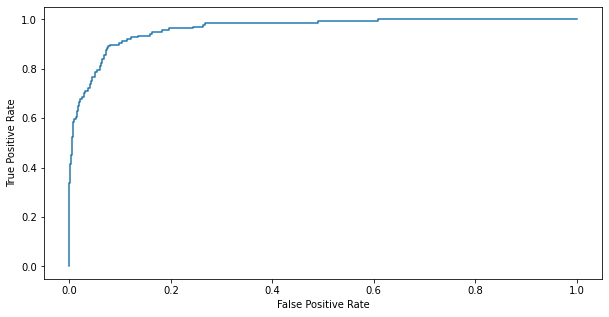

AUC =  0.9629092116467004


In [0]:
from sklearn import metrics

#################
# [0]: train_df, 
# [1]: test_df, 
# [2]: X_train, 
# [3]: X_test, 
# [4]: y_train,
# [5]: y_test

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(setpAIC_set[2],setpAIC_set[4])

#define metrics
y_pred_proba = log_regression.predict_proba(setpAIC_set[3])[::,1]
fpr_a, tpr_a, _ = metrics.roc_curve(setpAIC_set[5],  y_pred_proba)
auc_a = metrics.roc_auc_score(setpAIC_set[5], y_pred_proba)

#create ROC curve
plt.plot(fpr_a,tpr_a)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('AUC = ',auc_a)

### Challenger Model 2:

In [0]:
import pyspark.sql.functions as f
spark.createDataFrame(data) \
  .withColumn('Mortgage',f.when(f.col('Mortgage') > 0, 1).otherwise(0))                       \
  .withColumn('Experience',f.when(f.col('Experience') < 0, 0).otherwise(f.col('Experience'))) \
  .withColumn('Family',f.when(f.col('Family').isin([1,2]), 0).otherwise(1))                   \
  .withColumn('Education',f.when(f.col('Education') == 1, 0).otherwise(1))                    \
  .createOrReplaceTempView('train_2')
spark.sql('select * from train_2').display()

ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
1,25,1,49,91107,1,1.6,0,0,0,1,0,0,0
2,45,19,34,90089,1,1.5,0,0,0,1,0,0,0
3,39,15,11,94720,0,1.0,0,0,0,0,0,0,0
4,35,9,100,94112,0,2.7,1,0,0,0,0,0,0
5,35,8,45,91330,1,1.0,1,0,0,0,0,0,1
6,37,13,29,92121,1,0.4,1,1,0,0,0,1,0
7,53,27,72,91711,0,1.5,1,0,0,0,0,1,0
8,50,24,22,93943,0,0.3,1,0,0,0,0,0,1
9,35,10,81,90089,1,0.6,1,1,0,0,0,1,0
10,34,9,180,93023,0,8.9,1,0,1,0,0,0,0


In [0]:
%r
library(SparkR)

processed_r <- SparkR::sql('select Age, Experience, Income, Family, CCAvg, Education, Mortgage, SecuritiesAccount, CDAccount, Online, CreditCard, PersonalLoan from train')
processed_r <- collect(processed_r)

m2 <- lm(PersonalLoan ~ Income + CCAvg + CDAccount + Education + Family, data=processed_r)

print(summary(m2))


Call:
lm(formula = PersonalLoan ~ Income + CCAvg + CDAccount + Education + 
    Family, data = processed_r)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77533 -0.13562 -0.03327  0.06633  1.05373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.4077657  0.0158778 -25.682  < 2e-16 ***
Income       0.0031194  0.0001178  26.482  < 2e-16 ***
CCAvg        0.0115764  0.0030081   3.848 0.000121 ***
CDAccount    0.2560998  0.0173306  14.777  < 2e-16 ***
Education    0.0820537  0.0048425  16.944  < 2e-16 ***
Family       0.0344953  0.0035240   9.789  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2363 on 3494 degrees of freedom
Multiple R-squared:  0.3694,	Adjusted R-squared:  0.3685 
F-statistic: 409.3 on 5 and 3494 DF,  p-value: < 2.2e-16


In [0]:
%r
# Define the upper model as the FULL model
upper.lm <- lm(PersonalLoan ~ .,data=processed_r);

# Note: There is only one function for classical model selection in R - stepAIC();
# stepAIC() is part of the MASS library. 
library(MASS)

# Call stepAIC() for variable selection
print('stepwise')
stepwise.lm <- stepAIC(object=m2,scope=list(upper=formula(upper.lm),lower=~1),
direction=c('both'));

[1] "stepwise"
Start:  AIC=-10092.47
PersonalLoan ~ Income + CCAvg + CDAccount + Education + Family

                    Df Sum of Sq    RSS      AIC
+ CreditCard         1     1.061 194.04 -10109.6
+ SecuritiesAccount  1     0.669 194.43 -10102.5
+ Mortgage           1     0.221 194.88 -10094.4
+ Experience         1     0.187 194.92 -10093.8
+ Online             1     0.148 194.96 -10093.1
+ Age                1     0.134 194.97 -10092.9
<none>                           195.10 -10092.5
- CCAvg              1     0.827 195.93 -10079.7
- Family             1     5.350 200.45  -9999.8
- CDAccount          1    12.194 207.30  -9882.3
- Education          1    16.032 211.13  -9818.1
- Income             1    39.160 234.26  -9454.3

Step:  AIC=-10109.56
PersonalLoan ~ Income + CCAvg + CDAccount + Education + Family + 
    CreditCard

                    Df Sum of Sq    RSS      AIC
+ SecuritiesAccount  1     0.895 193.15 -10123.7
+ Online             1     0.208 193.83 -10111.3
+ Mortgage 

In [0]:
from sklearn.linear_model import LogisticRegression
import numpy as np

independent_vars = ['Income', 'CCAvg', 'CDAccount', 'Education', 'Family','CreditCard','SecuritiesAccount','Online','Experience','Age','Mortgage']
dependent_var    = ['PersonalLoan']

model_set_input = spark.sql('select * from train_2').toPandas()

enhanced_stepAIC_set = model_sets(model_set_input,independent_vars,dependent_var)

enhanced_stepAIC_model = log_reg_modelset(enhanced_stepAIC_set) #<-- DataFrame output containing y_actual and predictions

from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(enhanced_stepAIC_model[['PersonalLoan']], enhanced_stepAIC_model[['y_pred']])

enhanced_stepAIC_matrix = pd.DataFrame([['Enhanced_StepAIC',conf_matrix[0][0],conf_matrix[0][1],conf_matrix[1][0],conf_matrix[1][1]]], columns = ['Model','TP','TN','FP','FN'])
display(enhanced_stepAIC_matrix)

Model,TP,TN,FP,FN
Enhanced_StepAIC,1351,12,39,98


/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


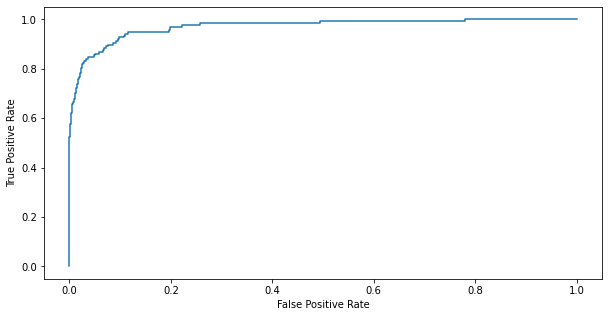

AUC =  0.9706851031698006


In [0]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(enhanced_stepAIC_set[2],enhanced_stepAIC_set[4])

#define metrics
y_pred_proba = log_regression.predict_proba(enhanced_stepAIC_set[3])[::,1]
fpr_ea, tpr_ea, _ = metrics.roc_curve(enhanced_stepAIC_set[5],  y_pred_proba)
auc_ea = metrics.roc_auc_score(enhanced_stepAIC_set[5], y_pred_proba)

#create ROC curve
plt.plot(fpr_ea,tpr_ea)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('AUC = ',auc_ea)

### Model Comparison and Predictive Accuracy

In [0]:
model_scores = niave_matrix.append(stepAIC_matrix).append(enhanced_stepAIC_matrix)

model_scores['precision']           = round(model_scores['TP']/(model_scores['TP'] + model_scores['FP']),3)
model_scores['recall']              = round(model_scores['TP']/(model_scores['TP'] + model_scores['FN']),3)
model_scores['specificity']         = round(model_scores['TN']/(model_scores['TN'] + model_scores['FP']),3)
model_scores['false_positive_rate'] = round(model_scores['FP']/(model_scores['FP'] + model_scores['TP']),3)
# F1 score is the harmonic mean of precision and recall which can be used for a sense of accuracy
model_scores['F1_Score']            = round(model_scores['TP']/(model_scores['TP'] + model_scores['FP']),3)
model_scores['accuracy']            = round((model_scores['TP'] + model_scores['TN'])/(model_scores['TP'] + model_scores['FP']+ model_scores['TN'] + model_scores['FN']),3)

model_scores

,Model,TP,TN,FP,FN,precision,recall,specificity,false_positive_rate,F1_Score,accuracy
0,Niave,1345,18,50,87,0.964,0.939,0.265,0.036,0.964,0.909
0,StepAIC,1346,17,50,87,0.964,0.939,0.254,0.036,0.964,0.909
0,Enhanced_StepAIC,1351,12,39,98,0.972,0.932,0.235,0.028,0.972,0.909


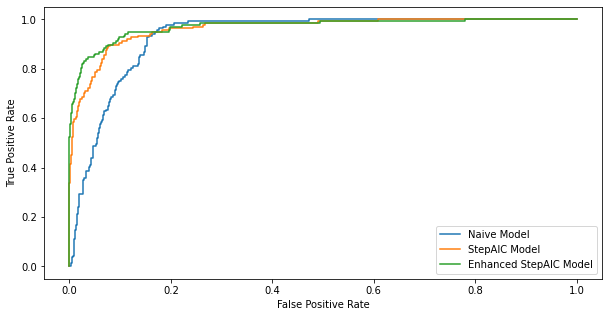

In [0]:
#create ROC curve
plt.plot(fpr_n,tpr_n, label = 'Naive Model')
plt.plot(fpr_a,tpr_a, label = 'StepAIC Model')
plt.plot(fpr_ea,tpr_ea, label = 'Enhanced StepAIC Model')
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print('AUC = ',auc)